<a href="https://colab.research.google.com/github/juanicesi1997/Pregunta-S.M.A.R.T/blob/main/Preparacion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Carga de librerias necesarias para hacer la preparacion de los datos

In [140]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
df = pd.read_excel('/content/drive/MyDrive/Reporte_cronicos_ESE_Ago_2016.xlsx', sheet_name= 'BASE', na_values='?')
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Fehca de Inscripcion,AÑO,Fecha Ultima Atención,IPS,1_PrimerNombre,2_SegundoNombre,3_PrimerApellido,4_SegundoApellido,5_TipoIdentificacion,6_Identificacion,...,31_ColesterolTotal,31_1_FechaCT,32_HDL,32_1_FechaHDL,33_LDL,33_1_FechaLDL,35_TFG,36_RcbeIECA,37_RcbeARA2,ENDOSALUD
0,NaT,2014.0,2014-01-02,PS COMUNEROS I,AQUILINO,NONE,MONDRAGON,CRUZ,CC,4740904.0,...,138.0,2015-10-09,26.0,2015-10-09,69.4,2015-10-09,44.839956,NO,NO,NO
1,NaT,2014.0,2014-01-02,PS CALIPSO,LUIS,EDUARDO,DUQUE,ORREGO,CC,16739096.0,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NO,NO,SI
2,NaT,2014.0,2014-01-02,PS CALIPSO,ZORAIDA,DE JESUS,DELGADO,QUIÑONES,CC,31904760.0,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NO,NO,NO
3,NaT,2014.0,2014-01-07,CS VALLADO,JULIA,ALICIA,MIRANDA,SOTO,CC,178199.0,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NO,NO,NO
4,NaT,2014.0,2014-01-07,PS CALIPSO,MARIA,DEL SOCORRO,GIRALDO,BURITICA,CC,43643679.0,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NO,NO,NO


In [ ]:
# Lo primero en la preparacion de los datos seria la exploracion de los mismos para conocer que se debe hacer

In [88]:
df.tail()

,Fehca de Inscripcion,AÑO,Fecha Ultima Atención,IPS,1_PrimerNombre,2_SegundoNombre,3_PrimerApellido,4_SegundoApellido,5_TipoIdentificacion,6_Identificacion,...,31_ColesterolTotal,31_1_FechaCT,32_HDL,32_1_FechaHDL,33_LDL,33_1_FechaLDL,35_TFG,36_RcbeIECA,37_RcbeARA2,ENDOSALUD
25845,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
25846,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
25847,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
25848,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
25849,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25850 entries, 0 to 25849
Data columns (total 50 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Fehca de Inscripcion                           6999 non-null   datetime64[ns]
 1   AÑO                                            24054 non-null  float64       
 2   Fecha Ultima Atención                          24054 non-null  datetime64[ns]
 3   IPS                                            24054 non-null  object        
 4   1_PrimerNombre                                 24054 non-null  object        
 5   2_SegundoNombre                                23904 non-null  object        
 6   3_PrimerApellido                               24054 non-null  object        
 7   4_SegundoApellido                              24004 non-null  object        
 8   5_TipoIdentificacion                           24054 non

In [90]:
df.describe()

,Fehca de Inscripcion,AÑO,Fecha Ultima Atención,6_Identificacion,7_FechaNac,EDAD (Años cumplidos),12_GrupoPob,13_CodMun,16_CodIPSsegto,Clasificación DM,...,28_1_FechaHemoGlico,29_1_FechaAlbnuria,30_Creatinuria,30_FechaCreatinuria,31_ColesterolTotal,31_1_FechaCT,32_HDL,32_1_FechaHDL,33_1_FechaLDL,35_TFG
count,6999,24054.000000,24054,2.405400e+04,24054,24054.000000,23710.000000,24117.0,2.405400e+04,0.0,...,4991,12358,367.000000,367,16822.000000,16822,16318.000000,16318,16355,16499.000000
mean,2015-09-07 06:53:32.687526912,2015.596865,2016-02-11 01:08:11.194811648,1.223896e+08,1953-06-22 14:42:28.465951616,63.037208,21.665415,76001.0,7.600104e+11,NaN,...,2016-04-29 12:23:13.548387072,2016-03-10 23:20:50.882019840,123.124714,2016-01-28 12:41:11.934604800,190.060516,2016-03-27 23:40:39.234336,47.562569,2016-03-29 03:58:21.164358400,2016-03-26 23:22:08.401100800,78.888944
min,2014-10-01 00:00:00,2014.000000,2014-01-02 00:00:00,6.064600e+04,1907-10-13 00:00:00,3.000000,5.000000,76001.0,7.600104e+11,NaN,...,2015-01-28 00:00:00,2015-01-30 00:00:00,14.430000,2015-06-25 00:00:00,62.000000,2015-06-01 00:00:00,3.000000,2015-06-01 00:00:00,2015-06-01 00:00:00,1.748531
25%,2015-02-24 00:00:00,2015.000000,2015-10-28 00:00:00,1.682317e+07,1943-06-26 00:00:00,54.000000,5.000000,76001.0,7.600104e+11,NaN,...,2016-03-11 00:00:00,2015-12-01 00:00:00,65.650000,2015-11-03 00:00:00,163.000000,2016-01-15 00:00:00,38.000000,2016-01-18 00:00:00,2016-01-13 00:00:00,55.231496
50%,2015-09-09 00:00:00,2016.000000,2016-06-27 00:00:00,2.957148e+07,1953-06-24 12:00:00,63.000000,31.000000,76001.0,7.600104e+11,NaN,...,2016-05-27 00:00:00,2016-04-04 00:00:00,106.360000,2016-01-28 00:00:00,187.000000,2016-04-21 00:00:00,45.000000,2016-04-21 00:00:00,2016-04-21 00:00:00,74.024024
75%,2016-03-10 00:00:00,2016.000000,2016-08-05 00:00:00,3.198693e+07,1962-06-17 00:00:00,73.000000,31.000000,76001.0,7.600104e+11,NaN,...,2016-07-19 00:00:00,2016-06-16 00:00:00,161.845000,2016-04-26 12:00:00,214.000000,2016-07-01 00:00:00,55.000000,2016-07-01 00:00:00,2016-07-01 00:00:00,97.036716
max,2016-08-31 00:00:00,2016.000000,2016-08-31 00:00:00,9.912091e+10,2013-03-21 00:00:00,109.000000,58.000000,76001.0,7.600104e+11,NaN,...,2016-09-09 00:00:00,2016-12-29 00:00:00,503.600000,2016-09-08 00:00:00,504.000000,2016-09-09 00:00:00,152.000000,2016-09-09 00:00:00,2016-09-09 00:00:00,552.500000
std,NaN,0.694749,NaN,2.512573e+09,NaN,13.793594,11.798491,0.0,8.193318e+00,NaN,...,NaN,NaN,79.175323,NaN,40.464164,NaN,13.976788,NaN,NaN,33.942964


In [91]:
df.isnull().sum()

,0
Fehca de Inscripcion,18851
AÑO,1796
Fecha Ultima Atención,1796
IPS,1796
1_PrimerNombre,1796
2_SegundoNombre,1946
3_PrimerApellido,1796
4_SegundoApellido,1846
5_TipoIdentificacion,1796
6_Identificacion,1796


In [92]:
df.duplicated().sum()

1794

In [93]:
df.columns

Index(['Fehca de Inscripcion', 'AÑO', 'Fecha Ultima Atención', 'IPS',
       '1_PrimerNombre', '2_SegundoNombre', '3_PrimerApellido',
       '4_SegundoApellido', '5_TipoIdentificacion', '6_Identificacion',
       '7_FechaNac', 'EDAD (Años cumplidos)', 'GRUPO EDAD', '8_Sexo',
       '9_Regimen', '10_EPS', '11_CodEtnia', '12_GrupoPob', '13_CodMun',
       '14_Telefono', '16_CodIPSsegto', '18_DxHTA', '20_DxDM',
       'Clasificación DM', '22_EtiologiaERC', '23_Peso', '24_Talla',
       'Indice Masa Corporal = Peso/talla Al Cuadrado', 'Clasificación IMC',
       '25_TenArtSis', '26_TenArtDitlica', 'CLASIFICACION FINAL DEL RIESGO',
       '27_Creatinina', '27_1_FechaCrea', '28_HemoGlicosilada',
       '28_1_FechaHemoGlico', '29_Albuminuria', '29_1_FechaAlbnuria',
       '30_Creatinuria', '30_FechaCreatinuria', '31_ColesterolTotal',
       '31_1_FechaCT', '32_HDL', '32_1_FechaHDL', '33_LDL', '33_1_FechaLDL',
       '35_TFG', '36_RcbeIECA', '37_RcbeARA2', 'ENDOSALUD'],
      dtype='object')

# **Limpieza de datos**

In [ ]:
# El segundo paso de la preparacion seria la limpieza de los datos por medio de los diferentes filtro

Para la limpeza de datos vamos a usar varios medios como:

1) limpieza de los duplicados

2) limpieza de los nulos por la media

3) eliminacion de las columnas que no son de interes para el analisis


In [94]:
# Eliminacion de los duplicados
df.drop_duplicates(inplace=True)

In [95]:
df.duplicated().sum()

0

In [100]:
# Eliminacion de columnas de poco interes

df.drop(['Fehca de Inscripcion', 'AÑO', 'Fecha Ultima Atención', 'IPS',
       '1_PrimerNombre', '2_SegundoNombre', '3_PrimerApellido',
       '4_SegundoApellido', '5_TipoIdentificacion', '6_Identificacion',
       '7_FechaNac', 'GRUPO EDAD',
       '9_Regimen', '10_EPS', '11_CodEtnia', '12_GrupoPob', '13_CodMun',
       '14_Telefono', '16_CodIPSsegto','Clasificación DM','27_Creatinina', '27_1_FechaCrea', '28_HemoGlicosilada',
       '28_1_FechaHemoGlico', '29_Albuminuria', '29_1_FechaAlbnuria',
       '30_Creatinuria', '30_FechaCreatinuria', '31_ColesterolTotal',
       '31_1_FechaCT', '32_HDL', '32_1_FechaHDL', '33_LDL', '33_1_FechaLDL',
       '35_TFG','ENDOSALUD'], axis=1, inplace=True)

In [101]:
df.columns

Index(['EDAD (Años cumplidos)', '8_Sexo', '18_DxHTA', '20_DxDM',
       '22_EtiologiaERC', '23_Peso', '24_Talla',
       'Indice Masa Corporal = Peso/talla Al Cuadrado', 'Clasificación IMC',
       '25_TenArtSis', '26_TenArtDitlica', 'CLASIFICACION FINAL DEL RIESGO',
       '36_RcbeIECA', '37_RcbeARA2'],
      dtype='object')

In [106]:
df.isnull().sum()

,0
EDAD (Años cumplidos),0
8_Sexo,0
18_DxHTA,0
20_DxDM,0
22_EtiologiaERC,0
23_Peso,985
24_Talla,817
Indice Masa Corporal = Peso/talla Al Cuadrado,817
Clasificación IMC,817
25_TenArtSis,1098


In [114]:
# Imputacion de los nulos por la media de las columnas a cda una de las columnas
# Primero tenemos que hacer que los valores de NaN sean convertidos a numero para despues poder aplicar la estrategia de reemplazar por la media
df['23_Peso'] = pd.to_numeric(df['23_Peso'], errors='coerce')
df['24_Talla'] = pd.to_numeric(df['24_Talla'], errors='coerce')
df['Indice Masa Corporal = Peso/talla Al Cuadrado'] = pd.to_numeric(df['Indice Masa Corporal = Peso/talla Al Cuadrado'], errors='coerce')
df['25_TenArtSis'] = pd.to_numeric(df['25_TenArtSis'], errors='coerce')
df['26_TenArtDitlica'] = pd.to_numeric(df['26_TenArtDitlica'], errors='coerce')

imputer = SimpleImputer(strategy='mean')

df['23_Peso'] = imputer.fit_transform(df[['23_Peso']])
df['24_Talla'] = imputer.fit_transform(df[['24_Talla']])
df['Indice Masa Corporal = Peso/talla Al Cuadrado'] = imputer.fit_transform(df[['Indice Masa Corporal = Peso/talla Al Cuadrado']])
df['25_TenArtSis'] = imputer.fit_transform(df[['25_TenArtSis']])
df['26_TenArtDitlica'] = imputer.fit_transform(df[['26_TenArtDitlica']]) # Changed '26_TenArtDia' to '26_TenArtDitlica'

In [115]:
df.isnull().sum()

,0
EDAD (Años cumplidos),0
8_Sexo,0
18_DxHTA,0
20_DxDM,0
22_EtiologiaERC,0
23_Peso,0
24_Talla,0
Indice Masa Corporal = Peso/talla Al Cuadrado,0
Clasificación IMC,817
25_TenArtSis,0


# **Transformacion de los datos**

In [ ]:
# Ahora vamos a usar el label encoder y one hot encoder para organizar y cambiar la categorias a numeros
# label encoder para categorias ordinales y one hot encoder para categorias nominales
''' Las variables o categorias 36_RcbeIECA, 37_RcbeARA2 y 8_Sexo a pesar de no ser ordinales se usa el label encoder debido a que son variables  binarias simples como "No" y "Sí", generalmente Label Encoding es suficiente y es la opción preferida. Esto se debe a que:

Es más eficiente en términos de espacio y procesamiento.
Mantiene el dataset más sencillo, sin agregar columnas adicionales innecesarias.
Modelos como los árboles de decisión, regresión logística, y redes neuronales suelen manejar bien variables binarias codificadas con 0 y 1.

Esa es la razon por la cual decidi elegir el label encoder en estas variables.'''

In [152]:
# creamos nuestro label encoder
labelencoder = LabelEncoder()
# Aplicamos individualmente a cada una de las categorias el label encode
df['Clasificación IMC label'] = labelencoder.fit_transform(df['Clasificación IMC'])
df['CLASIFICACION FINAL DEL RIESGO label'] = labelencoder.fit_transform(df['CLASIFICACION FINAL DEL RIESGO'])
df['36_RcbeIECA label'] = labelencoder.fit_transform(df['36_RcbeIECA'])
df['37_RcbeARA2 label '] = labelencoder.fit_transform(df['37_RcbeARA2'])
df['8_Sexo label'] = labelencoder.fit_transform(df['8_Sexo'])

In [153]:
# Debemos eliminar las columnas a las cuales les aplicamos el label encoder
df.drop(['Clasificación IMC', 'CLASIFICACION FINAL DEL RIESGO' '36_RcbeIECA','37_RcbeARA2','8_Sexo'], axis=1, inplace=True)

In [156]:
df.isnull().sum()

,0
EDAD (Años cumplidos),0
18_DxHTA,0
20_DxDM,0
22_EtiologiaERC,0
23_Peso,0
24_Talla,0
Indice Masa Corporal = Peso/talla Al Cuadrado,0
25_TenArtSis,0
26_TenArtDitlica,0
Clasificación IMC label,0


In [157]:
df.describe()

,EDAD (Años cumplidos),18_DxHTA,20_DxDM,22_EtiologiaERC,23_Peso,24_Talla,Indice Masa Corporal = Peso/talla Al Cuadrado,25_TenArtSis,26_TenArtDitlica,Clasificación IMC label,CLASIFICACION FINAL DEL RIESGO label,36_RcbeIECA label,37_RcbeARA2 label,8_Sexo label
count,24054.000000,24054.00000,24054.00000,24054.00000,24054.000000,24054.000000,24054.000000,24054.000000,24054.000000,24054.000000,24054.000000,24054.00000,24054.00000,24054.00000
mean,63.037208,0.50000,0.50000,0.50000,71.612694,159.711107,27.835867,124.698314,77.806684,2.107051,0.989191,0.50000,0.50000,0.50000
std,13.793594,0.50001,0.50001,0.50001,15.414258,8.384737,6.011156,15.153601,9.449314,0.929238,0.814658,0.50001,0.50001,0.50001
min,3.000000,0.00000,0.00000,0.00000,0.000000,92.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
25%,54.000000,0.00000,0.00000,0.00000,62.000000,155.000000,24.349609,120.000000,70.000000,1.000000,0.000000,0.00000,0.00000,0.00000
50%,63.000000,0.50000,0.50000,0.50000,71.000000,160.000000,27.548209,120.000000,80.000000,2.000000,1.000000,0.50000,0.50000,0.50000
75%,73.000000,1.00000,1.00000,1.00000,80.000000,165.000000,30.859375,130.000000,80.000000,3.000000,2.000000,1.00000,1.00000,1.00000
max,109.000000,1.00000,1.00000,1.00000,198.000000,259.000000,77.343750,250.000000,152.000000,4.000000,3.000000,1.00000,1.00000,1.00000


In [159]:
# Creamos nuestro one hot encoder
# Existen variables en el data set con las cuales no se puede usar el label encoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Aplicamos individualmente a cada una de las categorias el one hot encoder

df['18_DxHTA'] = encoder.fit_transform(df[['18_DxHTA']]).ravel()[:len(df)]
df['22_EtiologiaERC'] = encoder.fit_transform(df[['22_EtiologiaERC']]).ravel()[:len(df)]
df['20_DxDM'] = encoder.fit_transform(df[['20_DxDM']]).ravel()[:len(df)]


df_dum = pd.get_dummies(df, columns=['20_DxDM'], prefix=['20_DxDM_es'])
df_dum = pd.get_dummies(df, columns=['22_EtiologiaERC'], prefix=['22_EtiologiaERC_es'])

In [164]:
df.columns


Index(['EDAD (Años cumplidos)', '18_DxHTA', '20_DxDM', '22_EtiologiaERC',
       '23_Peso', '24_Talla', 'Indice Masa Corporal = Peso/talla Al Cuadrado',
       '25_TenArtSis', '26_TenArtDitlica', 'Clasificación IMC label',
       'CLASIFICACION FINAL DEL RIESGO label', '36_RcbeIECA label',
       '37_RcbeARA2 label ', '8_Sexo label'],
      dtype='object')

In [166]:
# Realizamos la estandarizacion de los datos ahora convertidos en numero
scaler = StandardScaler()
numerical_features = scaler.fit_transform(df[['EDAD (Años cumplidos)', '18_DxHTA', '20_DxDM', '22_EtiologiaERC',
       '23_Peso', '24_Talla', 'Indice Masa Corporal = Peso/talla Al Cuadrado',
       '25_TenArtSis', '26_TenArtDitlica', 'Clasificación IMC label',
       'CLASIFICACION FINAL DEL RIESGO label', '36_RcbeIECA label',
       '37_RcbeARA2 label ', '8_Sexo label']])

#  **Division de la muestra**

In [168]:
# Escogemos nuestras variables objetivo
predictores = ['EDAD (Años cumplidos)', '18_DxHTA', '20_DxDM', '22_EtiologiaERC',
       '23_Peso', '24_Talla', 'Indice Masa Corporal = Peso/talla Al Cuadrado',
       '25_TenArtSis', '26_TenArtDitlica', 'Clasificación IMC label','36_RcbeIECA label',
       '37_RcbeARA2 label ', '8_Sexo label']
objetivo = ['CLASIFICACION FINAL DEL RIESGO label']

In [169]:
#Recordemos que en nuestra variable Y va lo que queremos encontrar/predecir.
#Mientras en la vairable X van las variables predictoras
y= df[objetivo].values
X= df[predictores].values



In [170]:
from sklearn.model_selection import train_test_split
# Crear conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19243, 13)
(4811, 13)
(19243, 1)
(4811, 1)


In [171]:
# Se importa el modelo
from sklearn.linear_model import LogisticRegression

#Se crea el modelo
log_reg = LogisticRegression(solver='lbfgs',max_iter=1000)
#se entrena el modelo
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [172]:
print("Reemplazando los nulos con la media")
log_reg.score(X_test, y_test)

resultado poniendo la media en los nulos


0.44231968405736855

<function matplotlib.pyplot.show(close=None, block=None)>

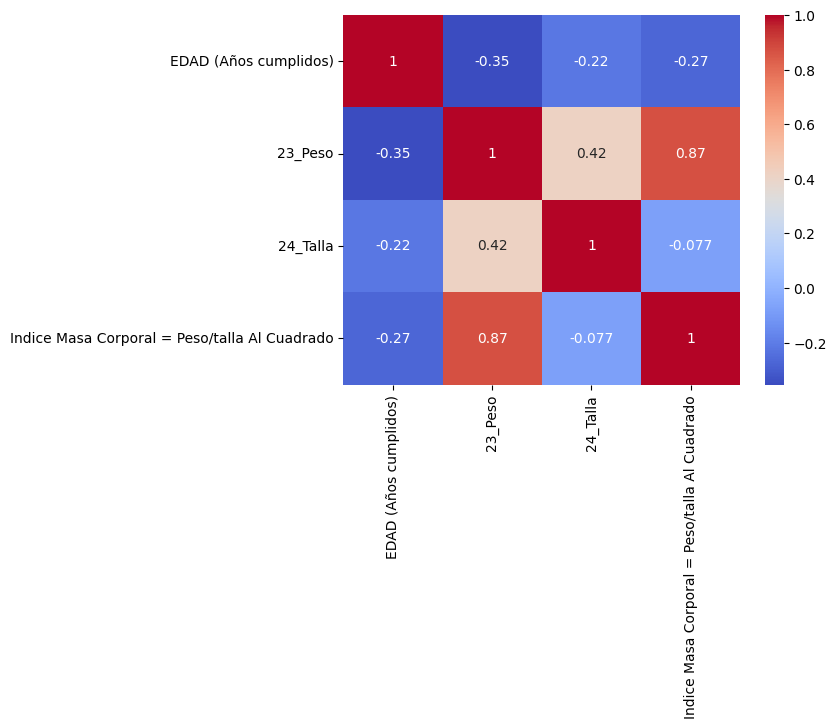

In [193]:
# Calculate correlation matrix, only including numerical features
df.corr(numeric_only=True)

sns.heatmap(df.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show

# **Comparacion cuando se eliminan los nulos**

In [173]:
df_eliminados_nulos = df = pd.read_excel('/content/drive/MyDrive/Reporte_cronicos_ESE_Ago_2016.xlsx', sheet_name= 'BASE', na_values='?')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [175]:
df_eliminados_nulos.drop_duplicates(inplace=True)

In [178]:
df_eliminados_nulos.drop(['Fehca de Inscripcion', 'AÑO', 'Fecha Ultima Atención', 'IPS',
       '1_PrimerNombre', '2_SegundoNombre', '3_PrimerApellido',
       '4_SegundoApellido', '5_TipoIdentificacion', '6_Identificacion',
       '7_FechaNac', 'GRUPO EDAD',
       '9_Regimen', '10_EPS', '11_CodEtnia', '12_GrupoPob', '13_CodMun',
       '14_Telefono', '16_CodIPSsegto','Clasificación DM','27_Creatinina', '27_1_FechaCrea', '28_HemoGlicosilada',
       '28_1_FechaHemoGlico', '29_Albuminuria', '29_1_FechaAlbnuria',
       '30_Creatinuria', '30_FechaCreatinuria', '31_ColesterolTotal',
       '31_1_FechaCT', '32_HDL', '32_1_FechaHDL', '33_LDL', '33_1_FechaLDL',
       '35_TFG','ENDOSALUD'], axis=1, inplace=True)

In [179]:
df_eliminados_nulos.dropna(inplace=True)

In [180]:
df.isnull().sum()

,0
EDAD (Años cumplidos),0
8_Sexo,0
18_DxHTA,0
20_DxDM,0
22_EtiologiaERC,0
23_Peso,0
24_Talla,0
Indice Masa Corporal = Peso/talla Al Cuadrado,0
Clasificación IMC,0
25_TenArtSis,0


In [221]:
# Escogemos nuestras variables objetivo
predictores = ['EDAD (Años cumplidos)', '18_DxHTA', '20_DxDM', '22_EtiologiaERC',
       '23_Peso', '24_Talla', 'Indice Masa Corporal = Peso/talla Al Cuadrado',
       '25_TenArtSis', '26_TenArtDitlica', 'Clasificación IMC','36_RcbeIECA',
       '37_RcbeARA2', '8_Sexo']
objetivo = ['CLASIFICACION FINAL DEL RIESGO']

#Recordemos que en nuestra variable Y va lo que queremos encontrar/predecir.
#Mientras en la vairable X van las variables predictoras
y= df_eliminados_nulos[objetivo].values
X= df_eliminados_nulos[predictores].values

In [222]:
from sklearn.model_selection import train_test_split
# Crear conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18124, 13)
(4532, 13)
(18124, 1)
(4532, 1)


In [223]:
# Se importa el modelo
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

#Se crea el modelo
log_reg = LogisticRegression(solver='lbfgs',max_iter=1000)

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore')

# Identify columns with mixed data types in X_train
for i in range(X_train.shape[1]):
  col_types = set(type(val) for val in X_train[:, i])
  if len(col_types) > 1:
    print(f"Column {i} has mixed types: {col_types}")

# Handle mixed types (example: convert everything to strings)
# This is just one approach - choose the best method based on your data
X_train = X_train.astype(str)

# Fit the encoder on the training data
encoder.fit(X_train)

# Transform the training and testing data (ensure X_test is also handled)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test.astype(str))

#se entrena el modelo
log_reg.fit(X_train, y_train)

Column 7 has mixed types: {<class 'int'>, <class 'str'>}
Column 8 has mixed types: {<class 'int'>, <class 'str'>}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [224]:
print("resultado borrando los nulos")
log_reg.score(X_test, y_test)

resultado borrando los nulos


0.5308914386584289

<function matplotlib.pyplot.show(close=None, block=None)>

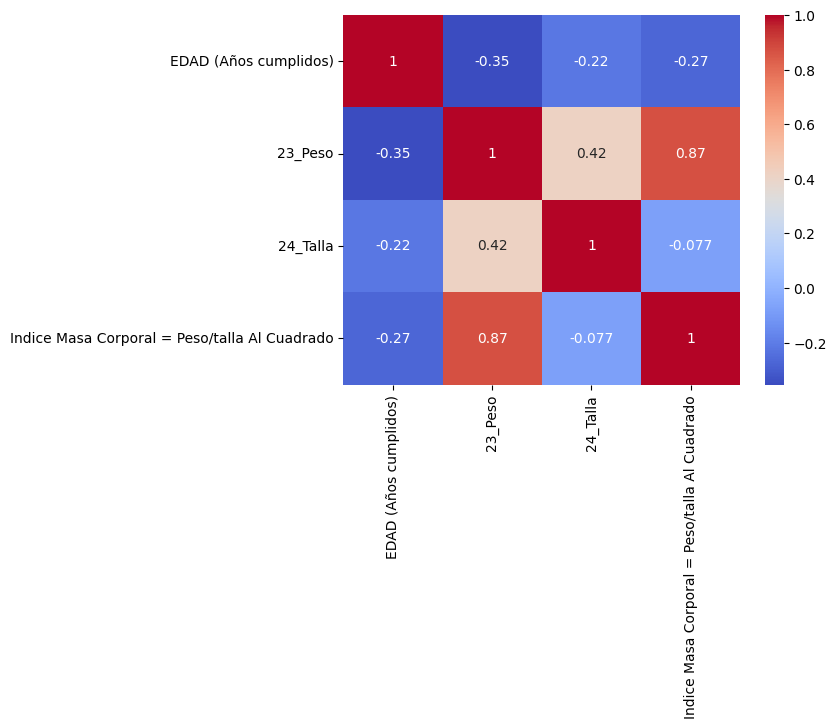

In [225]:
# Calculate correlation matrix, only including numerical features
df_eliminados_nulos.corr(numeric_only=True)

sns.heatmap(df_eliminados_nulos.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show